import library

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

load unknown data

In [ ]:
unknown_df= pd.read_csv(r"D:\Github\Data_Mining_113-2\Data_Mining_Final\classification\result\KNN_unknown.csv")
ids = unknown_df.iloc[:, 0]
X = np.array(unknown_df.iloc[:, 1:])
print(ids)
print(X)

0      sample_189
1      sample_320
2      sample_288
3        sample_6
4       sample_13
          ...    
217    sample_788
218    sample_794
219    sample_798
220    sample_799
221    sample_800
Name: id, Length: 222, dtype: object
[[ 0.41294407  2.69630547  3.28818135 ...  9.14306428  4.26506177
   0.        ]
 [ 0.          3.09000653  3.52619404 ...  9.81024064  5.86081882
   1.58688481]
 [ 0.          1.78663818  1.7684596  ...  9.91253461  8.25696817
   0.        ]
 ...
 [ 0.          3.24958187  3.70749166 ...  9.46671072  4.6774575
   0.5866927 ]
 [ 0.          2.59033853  2.78797567 ... 10.40058062  5.71875068
   0.        ]
 [ 0.          2.32524248  3.80593214 ...  9.84479363  4.55071601
   0.        ]]


initialize S,A,R matrices
S: Similarity 
A: Availability 
R: Responsibility

In [230]:
def s(x1, x2):
    return -np.sqrt(np.sum((x1 - x2) ** 2))

S = []
for n in X:
    row = []
    for k in X:
        row.append(s(n, k))
    S.append(row)
S = np.array(S)

preference = np.percentile(S, 5)

np.fill_diagonal(S, preference)

number_of_samples = len(S)
R = np.zeros((number_of_samples, number_of_samples))
A = np.zeros((number_of_samples, number_of_samples))


message passing

In [231]:
damping = 0.9
number_of_exemplars = []
for iteration in range(100):
    # Update Responsibility
    AS = A + S
    R_new = np.zeros_like(R)
    for n in range(number_of_samples):
        for k in range(number_of_samples):
            max_val = np.max(np.delete(AS[n], k))
            R_new[n, k] = S[n, k] - max_val
    # Apply damping
    R = damping * R + (1 - damping) * R_new

    # Update Availability
    Rp = np.maximum(R, 0)
    np.fill_diagonal(Rp, R.diagonal())

    A_new = np.zeros_like(A)
    for i in range(number_of_samples):
        for k in range(number_of_samples):
            if i != k:
                A_new[i, k] = min(0, R[k, k] + np.sum(Rp[:, k]) - Rp[i, k])
    for k in range(number_of_samples):
        A_new[k, k] = np.sum(Rp[:, k]) - Rp[k, k]
    # Apply damping
    A = damping * A + (1 - damping) * A_new
    number_of_exemplars.append(len(np.where(np.diag(A + R) > 0)[0]))
    print(f"Iteration {iteration + 1}: Number of Exemplar = {number_of_exemplars[-1]}")
    print("R",R)
    print("A",A)
   

Iteration 1: Number of Exemplar = 0
R [[-0.52075418 -0.04385165 -0.0409902  ... -0.43598206 -0.45508064
  -0.40400483]
 [-0.03970951 -0.51661204 -0.01585786 ... -0.43574674 -0.45766291
  -0.40118906]
 [-0.03684806 -0.01585786 -0.51661204 ... -0.45201235 -0.47072898
  -0.41574157]
 ...
 [-0.42362138 -0.4275282  -0.4437938  ... -0.5083935  -0.03928346
  -0.04167056]
 [-0.44058574 -0.44731015 -0.46037622 ... -0.03714924 -0.50625928
  -0.05231656]
 [-0.38572056 -0.38704692 -0.40159943 ... -0.03574697 -0.04852719
  -0.50246991]]
A [[ 0.00041421 -0.10241879 -0.10332241 ... -0.09989555 -0.09908671
  -0.10049398]
 [-0.10373662  0.00090362 -0.10332241 ... -0.09989555 -0.09908671
  -0.10049398]
 [-0.10373662 -0.10241879  0.         ... -0.09989555 -0.09908671
  -0.10049398]
 ...
 [-0.10373662 -0.10241879 -0.10332241 ...  0.00178315 -0.09908671
  -0.10049398]
 [-0.10373662 -0.10241879 -0.10332241 ... -0.09989555  0.00216515
  -0.10049398]
 [-0.10373662 -0.10241879 -0.10332241 ... -0.09989555 -0.0

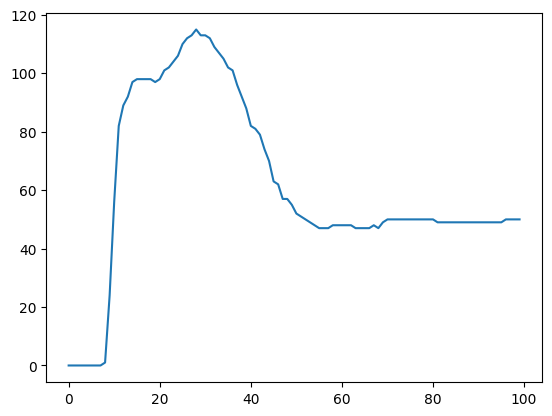

In [229]:
plt.plot(number_of_exemplars)

select exemplar

In [209]:
K = []

for k in range(number_of_samples):
    if R[k][k] + A[k][k] > 0:
        K.append(k)
result = {k: [k] for k in K}
for n in range(number_of_samples):
    if n not in K:
        index = K[np.argmax([R[n][k_] for k_ in K])] 
        result[index].append(n)
print(result)
print("number of clusters: ", len(result))
print([len(v) for v in result.values()])

{1: [1], 2: [2], 3: [3], 7: [7, 39], 9: [9], 11: [11], 12: [12], 29: [29], 30: [30], 34: [34], 38: [38, 8, 13], 42: [42], 45: [45], 47: [47, 6], 48: [48, 0, 4, 5, 10, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 35, 36, 37, 40, 41, 43, 44, 46], 49: [49], 53: [53], 54: [54, 50, 51, 52, 56, 58, 62, 63, 65, 68, 70, 71, 72, 73, 74, 75, 76, 77, 85, 86, 87, 91, 97, 106, 119, 123, 126, 133, 146], 55: [55], 57: [57], 59: [59], 66: [66, 84], 67: [67], 69: [69], 78: [78], 79: [79], 80: [80], 81: [81], 82: [82, 64], 83: [83, 134], 88: [88], 89: [89], 90: [90], 92: [92], 93: [93, 60, 98], 94: [94], 95: [95], 96: [96, 61], 99: [99], 101: [101, 113, 114, 121], 102: [102, 100, 105, 107, 108, 109, 117, 118, 120, 122, 124, 125, 129, 130, 131, 135, 139, 143, 144], 111: [111], 115: [115, 136, 148], 127: [127], 128: [128, 103], 132: [132, 104], 138: [138], 140: [140, 112], 142: [142], 147: [147, 110, 116, 137, 141, 145], 149: [149]}
number of clusters:  51
[1, 1, 1, 2, 1, 1, 1, 

Iteration 1: 0 exemplars
Iteration 2: 0 exemplars
Iteration 3: 101 exemplars
Iteration 4: 123 exemplars
Iteration 5: 124 exemplars
Iteration 6: 112 exemplars
Iteration 7: 121 exemplars
Iteration 8: 123 exemplars
Iteration 9: 126 exemplars
Iteration 10: 125 exemplars
Iteration 11: 122 exemplars
Iteration 12: 120 exemplars
Iteration 13: 119 exemplars
Iteration 14: 109 exemplars
Iteration 15: 97 exemplars
Iteration 16: 87 exemplars
Iteration 17: 82 exemplars
Iteration 18: 79 exemplars
Iteration 19: 74 exemplars
Iteration 20: 70 exemplars
Iteration 21: 68 exemplars
Iteration 22: 70 exemplars
Iteration 23: 70 exemplars
Iteration 24: 76 exemplars
Iteration 25: 78 exemplars
Iteration 26: 80 exemplars
Iteration 27: 80 exemplars
Iteration 28: 79 exemplars
Iteration 29: 79 exemplars
Iteration 30: 79 exemplars
Iteration 31: 79 exemplars
Iteration 32: 79 exemplars
Iteration 33: 79 exemplars
Iteration 34: 79 exemplars
Iteration 35: 78 exemplars
Iteration 36: 78 exemplars
Iteration 37: 78 exemplars


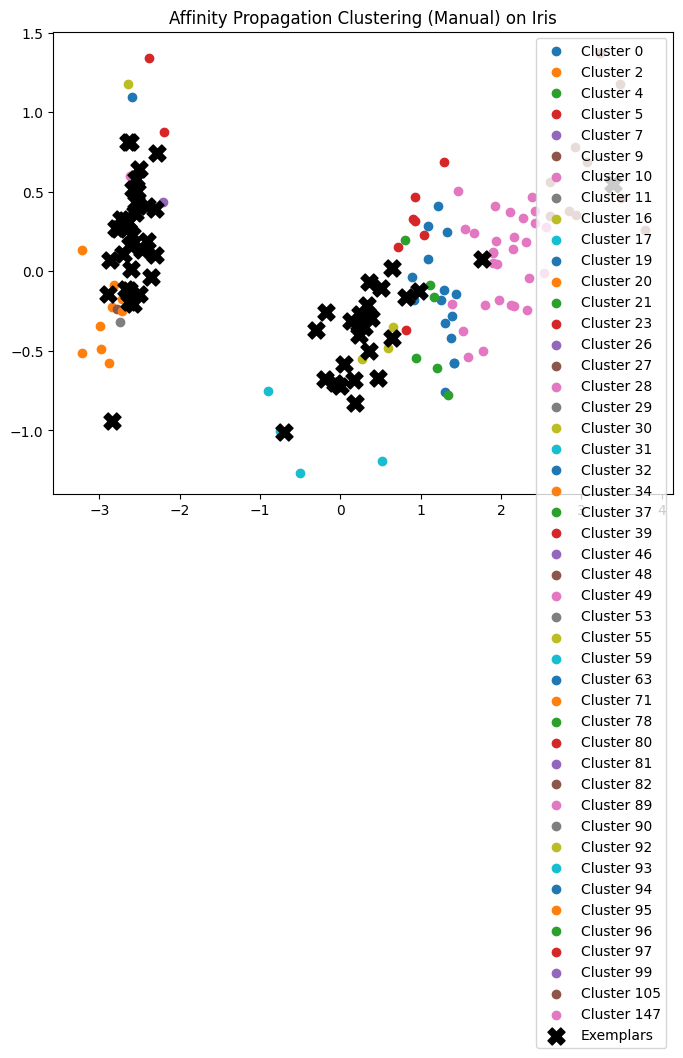

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

n_samples = X.shape[0]

# Step 1: Build the similarity matrix (negative squared Euclidean distance)
S = -np.square(np.linalg.norm(X[:, np.newaxis] - X[np.newaxis, :], axis=2))

# Step 2: Set the preference (controls number of clusters)
preference = np.percentile(S, 10)
np.fill_diagonal(S, preference)

# Step 3: Initialize matrices
R = np.zeros((n_samples, n_samples))
A = np.zeros((n_samples, n_samples))
damping = 0.75
max_iter = 200
converge_iter = 10

# Step 4: Iterative message passing
prev_exemplars = None
stable_count = 0

for it in range(max_iter):
    # Responsibility update
    AS = A + S
    R_new = np.zeros_like(R)
    for i in range(n_samples):
        for k in range(n_samples):
            row = AS[i].copy()
            row[k] = -np.inf  # exclude k
            R_new[i, k] = S[i, k] - np.max(row)
    R = damping * R + (1 - damping) * R_new

    # Availability update
    Rp = np.maximum(R, 0)
    np.fill_diagonal(Rp, R.diagonal())

    A_new = np.zeros_like(A)
    for i in range(n_samples):
        for k in range(n_samples):
            if i != k:
                A_new[i, k] = min(0, R[k, k] + np.sum(Rp[:, k]) - Rp[i, k])
    for k in range(n_samples):
        A_new[k, k] = np.sum(Rp[:, k]) - Rp[k, k]
    A = damping * A + (1 - damping) * A_new

    # Check convergence
    exemplars = np.where(np.diag(A + R) > 0)[0]
    if np.array_equal(exemplars, prev_exemplars):
        stable_count += 1
    else:
        stable_count = 0
    prev_exemplars = exemplars

    print(f"Iteration {it+1}: {len(exemplars)} exemplars")
    if stable_count >= converge_iter:
        print("Converged.")
        break

# Step 5: Assign points to exemplars
if len(exemplars) == 0:
    labels = np.zeros(n_samples, dtype=int)
else:
    labels = np.array([exemplars[np.argmax(S[i, exemplars])] for i in range(n_samples)])

# Step 6: Visualize using PCA
X_2d = PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(8, 6))
for label in np.unique(labels):
    plt.scatter(*X_2d[labels == label].T, label=f'Cluster {label}')
plt.scatter(*X_2d[exemplars].T, c='black', s=150, marker='X', label='Exemplars')
plt.legend()
plt.title('Affinity Propagation Clustering (Manual) on Iris')
plt.show()


Sklearn AP found 3 clusters.


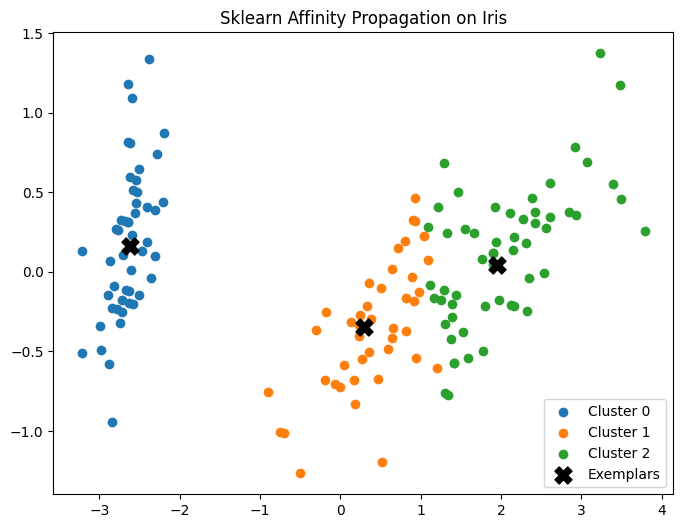

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


model = AffinityPropagation(random_state=0, preference = np.percentile(S, 0.01))
model.fit(X)

labels = model.labels_
cluster_centers_indices = model.cluster_centers_indices_

print(f"Sklearn AP found {len(cluster_centers_indices)} clusters.")

# Visualize
X_2d = PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(8, 6))
for label in np.unique(labels):
    plt.scatter(*X_2d[labels == label].T, label=f'Cluster {label}')
plt.scatter(*X_2d[cluster_centers_indices].T, c='black', s=150, marker='X', label='Exemplars')
plt.legend()
plt.title('Sklearn Affinity Propagation on Iris')
plt.show()


In [259]:
import numpy as np

def affinity_propagation(X, preference=None, damping=0.5, max_iter=200, convergence_iter=15):
    n_samples = X.shape[0]
    
    # Step 1: Compute similarity matrix (negative squared Euclidean)
    S = -np.square(np.linalg.norm(X[:, np.newaxis] - X[np.newaxis, :], axis=2))

    if preference is None:
        preference = np.median(S)

    np.fill_diagonal(S, preference)

    # Step 2: Initialize messages
    R = np.zeros((n_samples, n_samples))
    A = np.zeros((n_samples, n_samples))

    # For convergence checking
    exemplars_history = np.zeros((convergence_iter, n_samples), dtype=bool)
    for iteration in range(max_iter):
        # Update Responsibility
        AS = A + S
        max_indices = np.argmax(AS, axis=1)
        for i in range(n_samples):
            for k in range(n_samples):
                max_val = np.max(np.delete(AS[i], k))
                R[i, k] = S[i, k] - max_val
        R = damping * R + (1 - damping) * R

        # Update Availability
        Rp = np.maximum(R, 0)
        np.fill_diagonal(Rp, R.diagonal())
        for i in range(n_samples):
            for k in range(n_samples):
                if i == k:
                    A[i, k] = np.sum(Rp[:, k]) - Rp[k, k]
                else:
                    A[i, k] = min(0, R[k, k] + np.sum(Rp[:, k]) - Rp[i, k] - Rp[k, k])
        A = damping * A + (1 - damping) * A

        # Track exemplars to check convergence
        E = np.diag(A + R) > 0
        exemplars_history[iteration % convergence_iter] = E
        if iteration >= convergence_iter:
            if np.all(np.sum(exemplars_history, axis=0) == convergence_iter):
                print(f"Converged at iteration {iteration}")
                break

    # Assign labels
    exemplars = np.where(np.diag(A + R) > 0)[0]
    if len(exemplars) == 0:
        raise RuntimeError("No exemplars found — try lowering the preference")

    labels = np.zeros(n_samples, dtype=int)
    for i in range(n_samples):
        similarities = S[i, exemplars]
        labels[i] = exemplars[np.argmax(similarities)]

    return labels, exemplars
affinity_propagation(X, preference=np.percentile(S, 0.01), damping=0.5, max_iter=200, convergence_iter=15)

(array([ 17,  34,  47,  47,  37,  18,  47,  39,  38,  34,  48,  29,   1,
         38,  33,  33,  10,   0,   5,  21,  31,  19,   6,  26,  11,  34,
         23,  28,  27,  30,  29,  20,  33,  32,   9,  49,  10,   4,   8,
          7,  17,   8,  38,  26,  46,   1,  19,   3,  10,   7,  52,  56,
         50,  89,  58,  66,  51,  93,  75,  89,  93,  96,  92,  91,  82,
         75,  84,  92,  87,  80, 138,  97, 133,  63,  97,  65,  58,  52,
         91,  81,  81,  80,  92, 133,  66,  56,  52,  68,  95,  53,  94,
         63,  82,  57,  99,  96,  95,  74,  57,  96, 136, 142, 125, 116,
        132, 122,  84, 130, 128, 143, 147, 147, 139, 101, 121, 148, 137,
        131, 122,  72, 143, 101, 105, 126, 120, 129, 123, 138, 132, 125,
        107, 117, 128,  83, 103, 130, 148, 116, 127, 112, 144, 145, 101,
        120, 140, 141, 123, 110, 136, 127]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
      